<center><h1>Práctica 0</h1></center>

### Nombre: Christian Pillaga S.

In [1]:
from reportlab.lib.utils import ImageReader
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
from time import sleep
import os
import time as time
import pylab as pl
import numpy as np

In [2]:
inicioTime = time.time()

sunflowers = os.listdir('sunflower/')

os.system('mkdir -p sunflowerGris')
os.system('mkdir histogramas')
os.system('chmod 777 histogramas')

sunflowersGris = os.listdir('sunflowerGris/')

In [3]:
grisTime = 0
histograma3Time = 0
histograma1Time = 0

dicColor = {}
dicGris = {}

In [4]:
def peso(ruta):
    print('Método peso: ', ruta)
    t = 0
    
    for path, dirs, files in os.walk(ruta):
        for archivo in files:
            t += os.path.getsize(os.path.join(path, archivo))
            print('peso: ', t)
    
    return t

In [5]:
def aGris(sunflowers, grisTime):
    n = 0
    
    for i in sunflowers:
        inicioG = time.time()
        orden = 'convert\'sunflower/'+ i +'\'-set colorspace Gray -separate -average \'sunflower'
        os.system(orden)
        grisTime += (time.time() - inicioG)
        n += 1
        print('Tiempo Grises ', n, ' ' , str(grisTime/n), ' segundos')
        
    return grisTime

In [6]:
def histograma3(sunflowers, histograma3tiempo, dic_colores):
    print('______________________')
    print("_ Histogramas Color _")
    print('----------------------')
    n = 1

    for j in sunflowers:
        inicio = time.time()
        carpeta = j[0: len(j)-4: 1]
        existe = os.path.exists('histogramas3/Histogramas-'+ carpeta)
 
        if existe != True:
            os.system('mkdir -p histogramas3/Histogramas-'+ carpeta)
        
        orden = 'convert sunflower/'+ j +' -define histogram:unique-colors=true -format %c histogram:histogramas3/Histogramas-' + carpeta + '/histograma.gif'
        os.system(orden)
        orden = 'convert histogramas3/Histogramas-'+carpeta+'/histograma.gif -strip -resize 200% -separate histogramas3/Histogramas-'+ carpeta+'/canal-%d.gif'
        os.system(orden)

        dic_colores[str(n)] = round((time.time()-inicio),2)
        histograma3tiempo += (time.time()-inicio)
        n += 1
        print('T.P histogramas a color',n ,'::::',str(histograma3tiempo/n), 'segundos.')
        print('_________________________')
        print("_ Histogramas obtenidos _")
        print('-------------------------')
    return histograma3tiempo

In [7]:
def histograma1(sunflowers, histograma1tiempo, dic_grises):
    print('********************************')
    print("* Histogramas Escala de grises *")
    print('********************************')
    n = 1
 
    for sunflower in sunflowers:
        inicio_gris = time.time()
        print('------------ ',inicio_gris)
        carpeta = sunflower[0: len(sunflower)-4: 1]
        orden = 'convert sunflower/'+ sunflower\
                +' -colorspace Gray -define histogram:unique-colors=false histogram:histograma-'\
                + carpeta +'.gif'
        os.system(orden)
        os.system('mv histograma-'+ carpeta +'.gif histogramas1/')
        dic_grises[str(n)] = round((time.time()-inicio_gris),2)
        histograma1tiempo += (time.time()-inicio_gris)
        n += 1
        print('*************T.P Histogramas en Gris ',n ,'::::::::',str(histograma1tiempo/n), ' segundos.')
 
    print('_________________________________')
    print("* Histogramas obtenidos *")
    print('---------------------------------')
    return histograma1tiempo

In [8]:
def graficaG(dic_colores,dic_grises):
    f, ax = pl.subplots(figsize=(30,10))
    x = np.arange(len(dic_colores))
    pl.bar(x, dic_colores.values(), align='center', width=0.2, facecolor='#ff9999')
    pl.bar(x, dic_grises.values(), align='center', width=0.2, facecolor='#a5ff99')
    pl.xticks(x, dic_colores.keys())
    ymax = 2
    pl.ylim(0, ymax)
    pl.savefig('General', bbox_inches='tight',pad_inches=0.1)

In [9]:
def graficaColores(dic_colores):
    f, ax = pl.subplots(figsize=(30,10))
    x = np.arange(len(dic_colores))
    pl.bar(x, dic_colores.values(), align='center', width=0.2, facecolor='#ff9999')
    pl.xticks(x, dic_colores.keys())
 
    ##pl.title('Imágenes en Colores')
    ymax = 2
    pl.ylim(0, ymax)
    pl.savefig('Color', bbox_inches='tight',pad_inches=0.1)

In [10]:
def graficaGrises(dic_grises):
    f, ax = pl.subplots(figsize=(30,10))
    x = np.arange(len(dic_grises))
    pl.bar(x, dic_grises.values(), align='center', width=0.2, facecolor='#a5ff99')
    pl.xticks(x, dic_grises.keys())
 
    ##pl.title('Imágenes en Escala de Grises ')
    ymax = 0.05
    pl.ylim(0, ymax)
    pl.savefig('Gris', bbox_inches='tight',pad_inches=0.1)

Tiempo Grises  1   0.01897287368774414  segundos
Tiempo Grises  2   0.021487712860107422  segundos
Tiempo Grises  3   0.021982272466023762  segundos
Tiempo Grises  4   0.02090001106262207  segundos
Tiempo Grises  5   0.022516202926635743  segundos
Tiempo Grises  6   0.02192831039428711  segundos
Tiempo Grises  7   0.02279496192932129  segundos
Tiempo Grises  8   0.02281889319419861  segundos
Tiempo Grises  9   0.02228236198425293  segundos
Tiempo Grises  10   0.022452688217163085  segundos
Tiempo Grises  11   0.022228696129538796  segundos
Tiempo Grises  12   0.022874752680460613  segundos
Tiempo Grises  13   0.022806589420025166  segundos
Tiempo Grises  14   0.022819348743983676  segundos
Tiempo Grises  15   0.022630612055460613  segundos
Tiempo Grises  16   0.0222771018743515  segundos
Tiempo Grises  17   0.02225807133842917  segundos
Tiempo Grises  18   0.022187603844536677  segundos
Tiempo Grises  19   0.02207176308882864  segundos
Tiempo Grises  20   0.02176826000213623  segundos


T.P histogramas a color 29 :::: 0.0769396239313586 segundos.
_________________________
_ Histogramas obtenidos _
-------------------------
T.P histogramas a color 30 :::: 0.0770401398340861 segundos.
_________________________
_ Histogramas obtenidos _
-------------------------
T.P histogramas a color 31 :::: 0.07739203976046655 segundos.
_________________________
_ Histogramas obtenidos _
-------------------------
T.P histogramas a color 32 :::: 0.07762854546308517 segundos.
_________________________
_ Histogramas obtenidos _
-------------------------
T.P histogramas a color 33 :::: 0.07794098420576616 segundos.
_________________________
_ Histogramas obtenidos _
-------------------------
T.P histogramas a color 34 :::: 0.07788271763745476 segundos.
_________________________
_ Histogramas obtenidos _
-------------------------
T.P histogramas a color 35 :::: 0.07805630138942174 segundos.
_________________________
_ Histogramas obtenidos _
-------------------------
T.P histogramas a colo

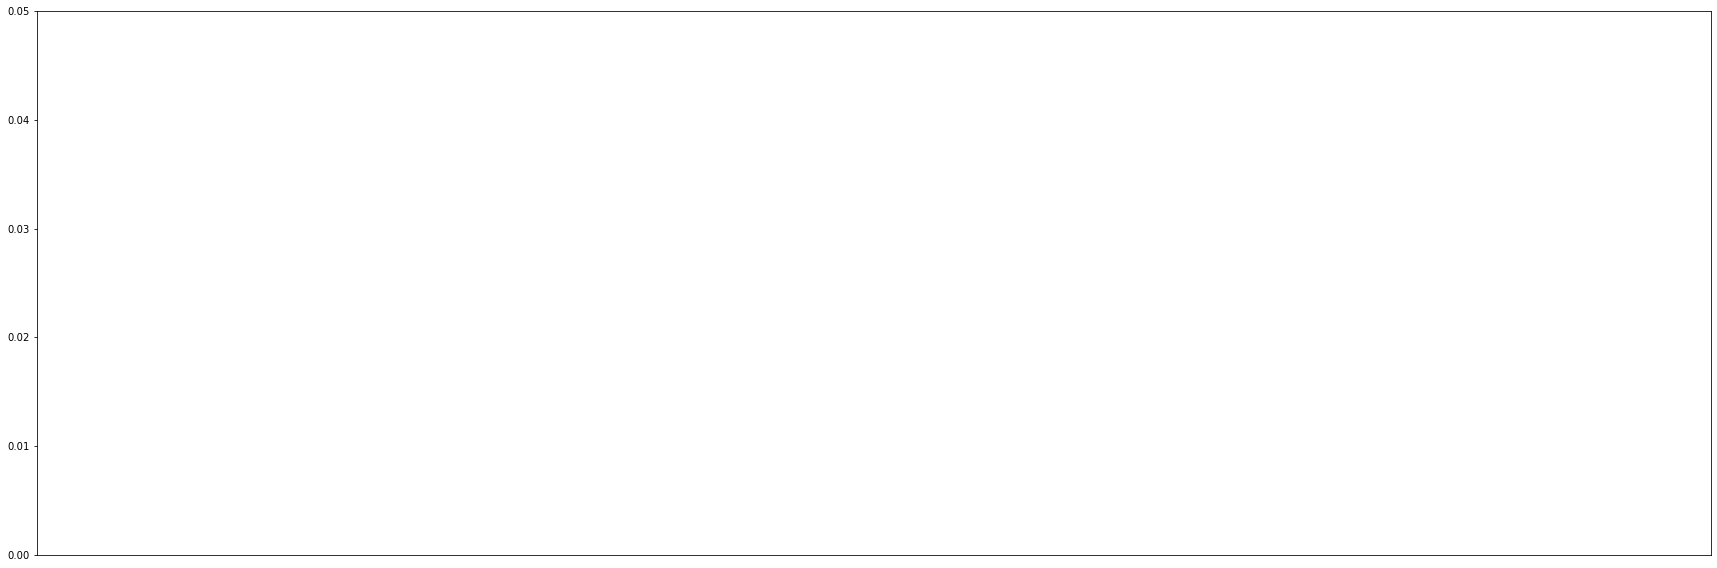

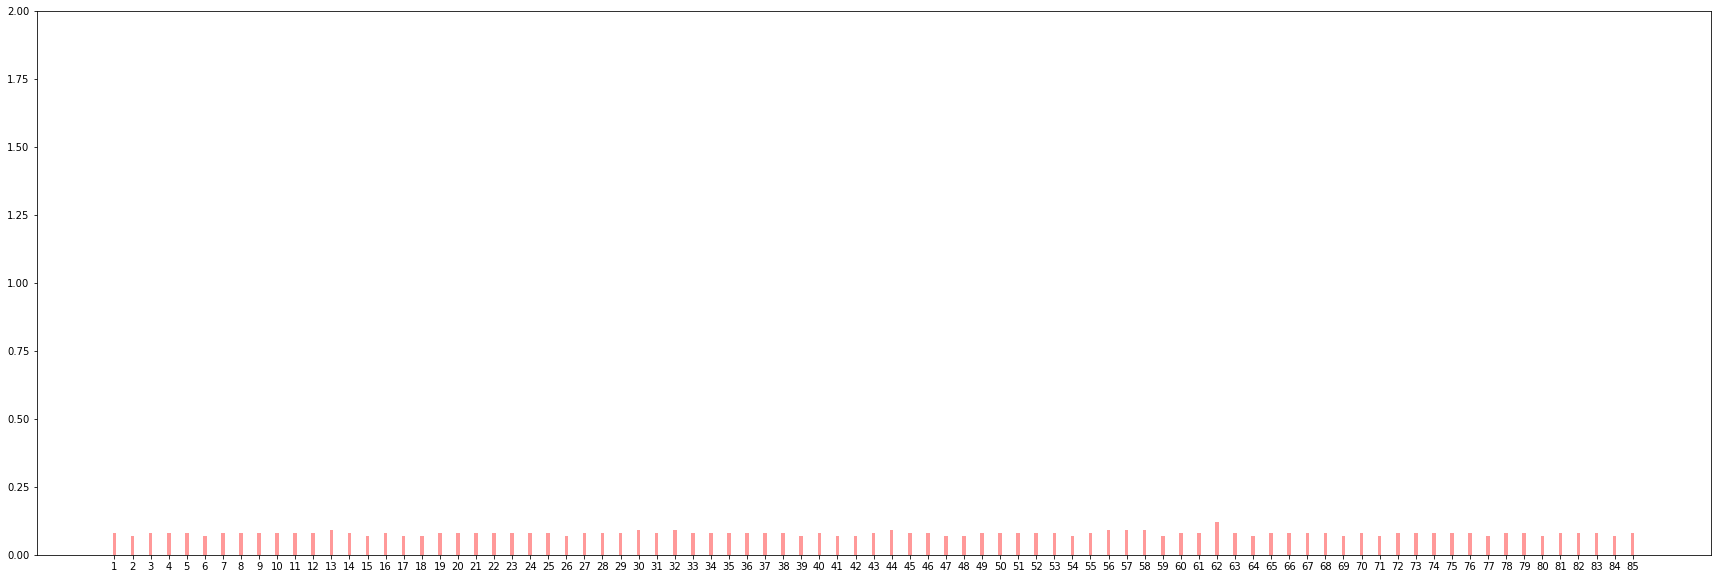

In [11]:
grisTime = aGris(sunflowers, grisTime)
histograma1Time = histograma1(sunflowersGris, histograma1Time, dicGris)
histograma3Time = histograma3(sunflowers, histograma3Time, dicColor)
peso_color = peso('sunflower/')/1048576
peso_gris = peso('sunflowerGris/')/1048576
tiempo = (time.time()-inicioTime)

graficaGrises(dicGris)
graficaColores(dicColor)

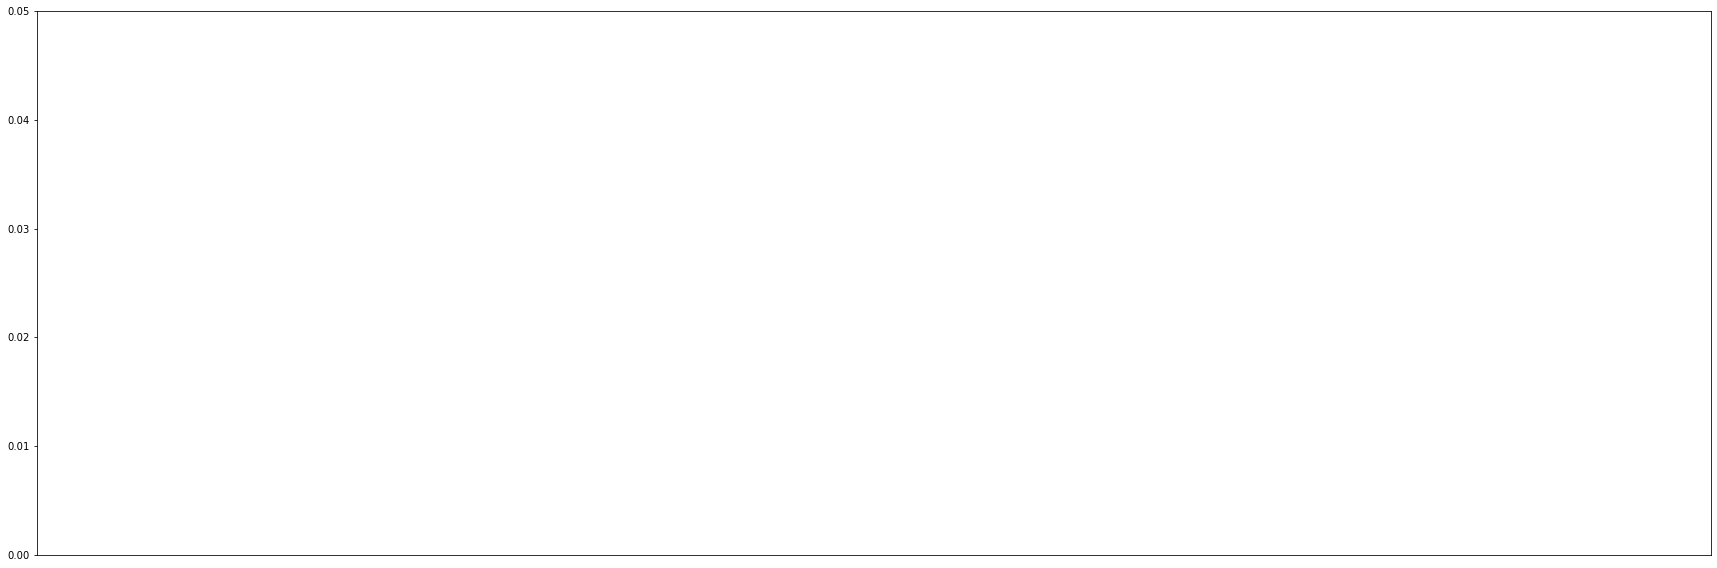

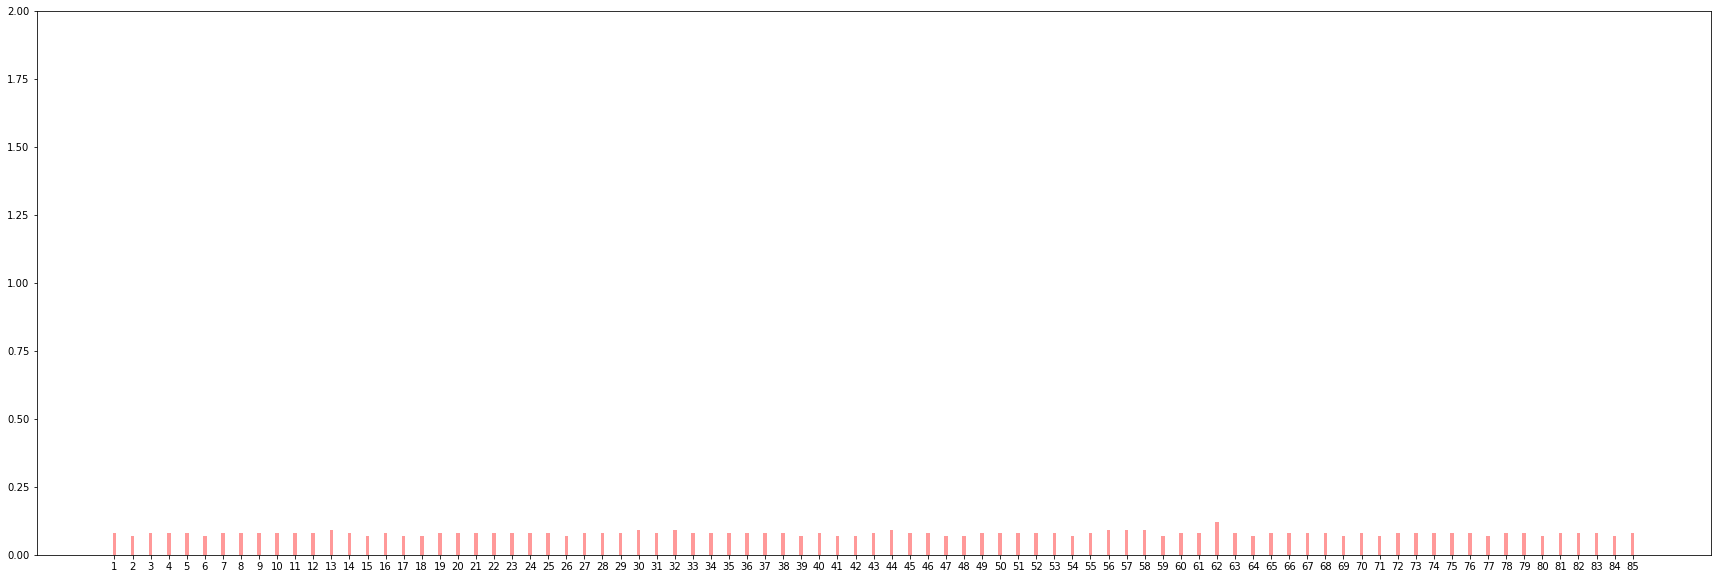

In [12]:
##PASO Parametros
graficaGrises(dicGris)
graficaColores(dicColor)

In [13]:
print('Generando PDF')
logo = ImageReader('https://www.ups.edu.ec/ups_portal-theme/images/ups/home/logo-ups-home.png')
documento = canvas.Canvas('Informe', pagesize=A4)
documento.setFont("Helvetica", 23)
documento.setFillColor('red')
documento.drawImage(logo, 10, 10, mask='auto')
documento.drawString(100,800,' Práctica 0')
documento.setFont("Helvetica", 12)
documento.setFillColor('black')
x = 15
y = 770
documento.setFillColor('green')
documento.drawString(x,y,'Realizado por: Braulio Castro')
documento.setFillColor('blue')
documento.drawString(x,y-20,'Procedimiento:')
documento.setFont("Helvetica", 12)
documento.setFillColor('black')
documento.drawString(x,y-40,'– Tiempo que toma procesar todas las imágenes: '+str(tiempo)+' s.')
documento.drawString(x,y-60,'– Tiempo promedio Conversión Escala de grises: '+str(grisTime)+' s.')
documento.drawString(x,y-80,'– Tiempo promedio Histograma Imágenes a color: '+str(histograma3Time)+' s.')
documento.drawString(x,y-100,'– Tiempo promedio Histograma Imágenes grises: '+str(histograma1Time)+' s.')
documento.drawString(x,y-120,'– Tamaño inicial de las imágenes (color): '+str(peso_color)+' s.')
documento.drawString(x,y-140,'– Tamaño final (escala de grises): '+str(peso_gris))
documento.setFont("Helvetica", 20)
documento.setFillColor('red')
documento.drawString(x+240,y-180,'Gráficos')
documento.drawImage("Color.png", 10, y-400, width=580, height=200)
documento.setFont("Helvetica", 12)
documento.setFillColor('green')
documento.drawString(x+120,y-425,'Tiempo Histograma de 1 canal')
documento.drawImage("Gris.png", 10, y-630, width=580, height=200)
documento.drawString(x+120,y-650,'Tiempo Histograma de 3 canales')
documento.showPage()

Generando PDF


In [14]:
f = open("script.py","r")
lineas = f.readlines()
f.close()
for linea in lineas:
    y = y-20
    
    if y < 40:
        documento.showPage()
        documento.setFont("Helvetica", 15)
        documento.drawString(x,20,'Github =====: https://github.com/cpillaga/Practica0-IA2')
        y = 770
    documento.drawString(x,y,linea[0:len(linea)-1])
documento.save()
print('Proceso Terminado')

Proceso Terminado
